In [2]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For handling missing values

# Step 1: Load the dataset
# Replace the file path with the actual path to your CSV file
file_path = "User Experience Feedback.csv"

# Read the CSV file into a pandas DataFrame
try:
    data = pd.read_csv(file_path, encoding='utf-8')  # Adjust encoding if necessary
    print("Dataset loaded successfully!")
except Exception as e:
    print(f"Error loading the dataset: {e}")

# Step 2: Inspect the dataset
# Display the first few rows of the dataset to understand its structure
print("First 5 rows of the dataset:")
print(data.head())

# Display information about the dataset
print("\nDataset Info:")
print(data.info())

# Display the column names for reference
print("\nColumn Names:")
print(data.columns)

# Step 3: Handle missing values
# Check for missing values in the dataset
print("\nMissing Values per Column:")
print(data.isnull().sum())

# Option 1: Fill missing values
# Replace NaN (missing) values with a placeholder like "N/A" or a suitable default value
data.fillna("N/A", inplace=True)

# Option 2: Drop rows/columns with excessive missing values (if applicable)
# Uncomment the following line if you want to drop rows with missing values
# data.dropna(inplace=True)

# Step 4: Standardize column names
# Clean and standardize column names (remove special characters, spaces, etc.)
data.columns = data.columns.str.strip().str.replace(' ', '_').str.replace(r'[^\w]', '', regex=True)

# Step 5: Convert data types if necessary
# Example: Convert age column to integers (if applicable)
if 'What_is_your_age' in data.columns:
    data['What_is_your_age'] = pd.to_numeric(data['What_is_your_age'], errors='coerce')  # Convert to numeric
    print("Converted age column to numeric.")

# Step 6: Drop columns with no data
# Drop 'What_is_your_age' as it has no non-null values
data.drop(columns=['What_is_your_age'], inplace=True)
print("\nColumn 'What_is_your_age' has been dropped due to lack of data.")

# Step 7: Convert categorical/ordinal data to appropriate types
# Example: Converting Yes/No responses to binary (1 for Yes, 0 for No)
binary_columns = [
    'Were_you_able_to_successfully_complete_your_task_using_ChatGPT',
    'Did_ChatGPT_save_you_time_in_completing_your_tasks',
    'Would_you_use_ChatGPT_again_for_similar_tasks'
]

# Map Yes/No to 1/0
for col in binary_columns:
    data[col] = data[col].map({'Yes': 1, 'No': 0})

# Example: Convert ratings to numeric (if applicable)
# Checking and converting numeric columns with string values
numeric_columns = [
    'How_effectively_did_ChatGPT_provide_solutions_or_answers_to_your_queries',
    'How_would_you_rate_ChatGPTs_reliability_in_delivering_consistent_responses'
]

for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Convert to numeric, set invalid values as NaN

# Step 8: Handle missing values in numeric columns
# Replace "N/A" in numeric columns with NaN to ensure compatibility
numeric_columns = [
    'How_familiar_are_you_with_using_AI_chatbots',
    'How_easy_was_it_to_interact_with_ChatGPT',
    'How_engaging_did_you_find_the_interaction_with_ChatGPT',
    'How_enjoyable_was_your_experience_with_ChatGPT'
]

# Replace non-numeric "N/A" values with NaN
for col in numeric_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')  # Coerce invalid values to NaN

# Handle missing values in numeric columns (fill with -1)
data[numeric_columns] = data[numeric_columns].fillna(-1)

# Step 9: Handle missing values in categorical columns
categorical_columns = [
    'Were_you_able_to_successfully_complete_your_task_using_ChatGPT',
    'Was_ChatGPT_able_to_understand_your_questions_or_prompts_accurately',
    'How_effectively_did_ChatGPT_provide_solutions_or_answers_to_your_queries',
    'Did_ChatGPT_save_you_time_in_completing_your_tasks',
    'How_would_you_rate_ChatGPTs_reliability_in_delivering_consistent_responses',
    'Would_you_use_ChatGPT_again_for_similar_tasks'
]

# Fill missing values in categorical columns with 'Unknown'
data[categorical_columns] = data[categorical_columns].fillna('Unknown')

# Step 10: Validate numeric columns to ensure they're correctly cast
# Confirm numeric conversion
print("\nValidated Data Types:")
print(data.dtypes)

# Step 11: Review missing values after fixes
missing_values_after_cleanup = data.isnull().sum()
print("\nMissing Values after additional cleanup:")
print(missing_values_after_cleanup)


Dataset loaded successfully!
First 5 rows of the dataset:
  What is your age?   What is your gender?    \
0             25 - 34                   Male   
1            Under 18                   Male   
2             18 - 24                   Male   
3            Under 18                 Female   
4             18 - 24                 Female   

  What is your level of education?    \
0                       Postgraduate   
1                   Secondary School   
2                       Postgraduate   
3                      Undergraduate   
4                      Undergraduate   

   How familiar are you with using AI chatbots?   \
0                                              5   
1                                              2   
2                                              2   
3                                              3   
4                                              5   

  What task did you attempt to complete using ChatGPT?  (e.g. Assignment, Research, Calculation etc

C:\Users\PSALMTECH\AppData\Local\Temp\ipykernel_12180\3547456661.py:36: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'N/A' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  data.fillna("N/A", inplace=True)



Column 'What_is_your_age' has been dropped due to lack of data.

Validated Data Types:
What_is_your_gender                                                                                  object
What_is_your_level_of_education                                                                      object
How_familiar_are_you_with_using_AI_chatbots                                                           int64
What_task_did_you_attempt_to_complete_using_ChatGPT__eg_Assignment_Research_Calculation_etc          object
Were_you_able_to_successfully_complete_your_task_using_ChatGPT                                       object
How_easy_was_it_to_interact_with_ChatGPT                                                              int64
Was_ChatGPT_able_to_understand_your_questions_or_prompts_accurately                                  object
How_effectively_did_ChatGPT_provide_solutions_or_answers_to_your_queries                             object
Did_ChatGPT_save_you_time_in_completing_your_tas

In [3]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the cleaned dataset
file_path = "Cleaned_User_Experience_Feedback.csv"
data = pd.read_csv(file_path)

# Display the first few rows to confirm successful load
data.head()


,What_is_your_gender,What_is_your_level_of_education,How_familiar_are_you_with_using_AI_chatbots,What_task_did_you_attempt_to_complete_using_ChatGPT__eg_Assignment_Research_Calculation_etc,Were_you_able_to_successfully_complete_your_task_using_ChatGPT,How_easy_was_it_to_interact_with_ChatGPT,Was_ChatGPT_able_to_understand_your_questions_or_prompts_accurately,How_effectively_did_ChatGPT_provide_solutions_or_answers_to_your_queries,Did_ChatGPT_save_you_time_in_completing_your_tasks,How_would_you_rate_ChatGPTs_reliability_in_delivering_consistent_responses,Would_you_use_ChatGPT_again_for_similar_tasks,How_engaging_did_you_find_the_interaction_with_ChatGPT,Did_ChatGPTs_responses_feel_natural_and_humanlike,Did_ChatGPTs_responses_evoke_any_emotional_reaction_eg_frustration_delight_confusionShort_answer,How_enjoyable_was_your_experience_with_ChatGPT,Would_you_recommend_ChatGPT_to_others_based_on_your_experience,What_did_you_like_most_about_ChatGPT,What_did_you_dislike_or_find_frustrating_about_ChatGPT,On_a_scale_of_1_to_5_how_would_you_rate_ChatGPT_overall,What_suggestions_do_you_have_for_improving_ChatGPT
0,Male,Postgraduate,5,Research work,1.0,1,"Yes, completely",NaN,NaN,NaN,NaN,5,Met expectations,Delight and sometimes confusion,NaN,NaN,Response,NaN,NaN,Irrelevant information somerime
1,Male,Secondary School,2,code,1.0,5,"Yes, completely",NaN,NaN,NaN,NaN,4,Exceeded expectations,delight,NaN,NaN,allucinate,NaN,NaN,too wordy
2,Male,Postgraduate,2,Research,1.0,1,"Yes, completely",NaN,NaN,5.0,NaN,4,Neutral,Short answer delight,4.0,Definitely,I like it's depth in knowledge,It can not reason on it own,4.0,Improve it interactive
3,Female,Undergraduate,3,Research,1.0,3,"Yes, completely",NaN,NaN,2.0,NaN,3,Neutral,Joy,4.0,Neutral,NaN,NaN,3.0,Yes
4,Female,Undergraduate,5,Assignments,1.0,2,"Yes, partially",NaN,NaN,4.0,NaN,3,Neutral,"Sometimes, it amused me",4.0,Probably,NaN,NaN,4.0,It needs to start accepting images and generat...


In [4]:
# Select numeric columns for analysis
numeric_columns = [
    'How_familiar_are_you_with_using_AI_chatbots',
    'How_easy_was_it_to_interact_with_ChatGPT',
    'How_engaging_did_you_find_the_interaction_with_ChatGPT',
    'How_enjoyable_was_your_experience_with_ChatGPT'
]

# Calculate descriptive statistics
numeric_stats = data[numeric_columns].describe()
print("Descriptive Statistics for Numeric Columns:")
print(numeric_stats)


Descriptive Statistics for Numeric Columns:
       How_familiar_are_you_with_using_AI_chatbots  \
count                                   530.000000   
mean                                      3.762264   
std                                       1.137142   
min                                       1.000000   
25%                                       3.000000   
50%                                       4.000000   
75%                                       5.000000   
max                                       5.000000   

       How_easy_was_it_to_interact_with_ChatGPT  \
count                                530.000000   
mean                                   2.677358   
std                                    1.374785   
min                                    1.000000   
25%                                    1.000000   
50%                                    3.000000   
75%                                    4.000000   
max                                    5.000000   

       Ho

In [5]:
# Reload the original dataset to fetch the correct column
original_data = pd.read_csv("User Experience Feedback.csv")

# Replace the cleaned column with the original data
data['Would_you_use_ChatGPT_again_for_similar_tasks'] = original_data['Would you use ChatGPT again for similar tasks?']

# Check if the data has been restored
print(data['Would_you_use_ChatGPT_again_for_similar_tasks'].value_counts(dropna=False))


Would_you_use_ChatGPT_again_for_similar_tasks
Definitely        332
Probably          167
Not sure           26
Probably not        3
Definitely not      2
Name: count, dtype: int64


In [6]:
# Select categorical columns for analysis
categorical_columns = [
    'What_is_your_gender',
    'What_is_your_level_of_education',
    'Were_you_able_to_successfully_complete_your_task_using_ChatGPT',
    'Would_you_use_ChatGPT_again_for_similar_tasks'
]

# Calculate frequency counts for each categorical column
for col in categorical_columns:
    print(f"\nFrequency Counts for {col}:")
    print(data[col].value_counts())



Frequency Counts for What_is_your_gender:
What_is_your_gender
Male                        406
Female                      116
Prefer not to say             5
Female;Prefer not to say      2
Male;Female                   1
Name: count, dtype: int64

Frequency Counts for What_is_your_level_of_education:
What_is_your_level_of_education
Undergraduate       483
Postgraduate         33
Secondary School     14
Name: count, dtype: int64

Frequency Counts for Were_you_able_to_successfully_complete_your_task_using_ChatGPT:
Were_you_able_to_successfully_complete_your_task_using_ChatGPT
1.0    432
0.0     20
Name: count, dtype: int64

Frequency Counts for Would_you_use_ChatGPT_again_for_similar_tasks:
Would_you_use_ChatGPT_again_for_similar_tasks
Definitely        332
Probably          167
Not sure           26
Probably not        3
Definitely not      2
Name: count, dtype: int64


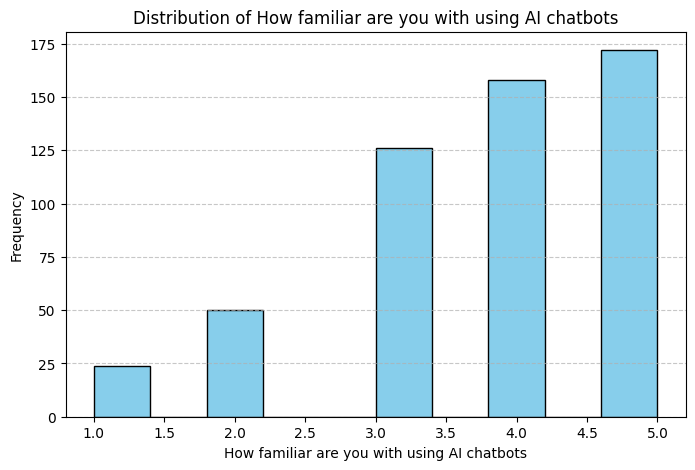

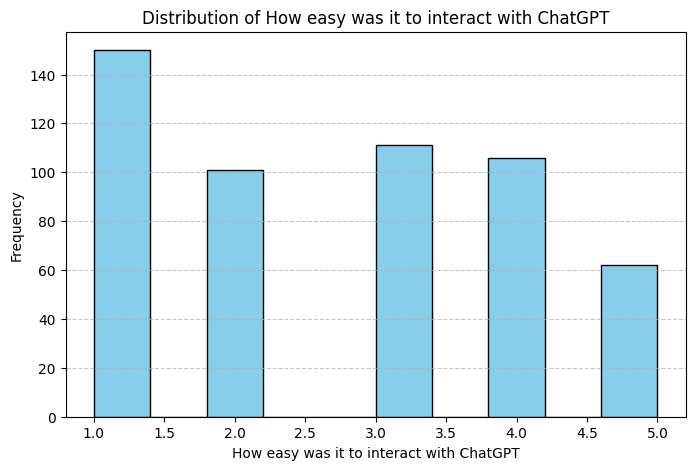

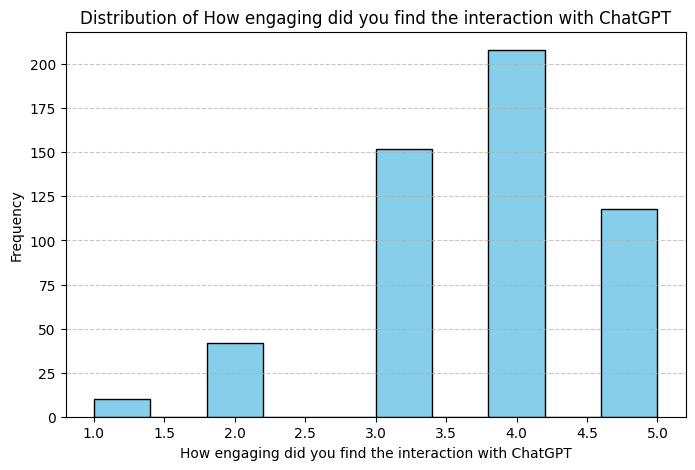

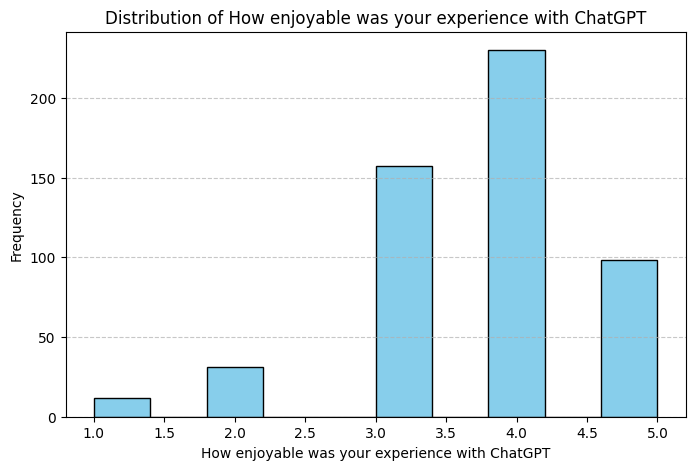

In [7]:
# Plot histograms for numeric columns
for col in numeric_columns:
    plt.figure(figsize=(8, 5))
    plt.hist(data[col], bins=10, color='skyblue', edgecolor='black')
    plt.title(f"Distribution of {col.replace('_', ' ')}")
    plt.xlabel(col.replace('_', ' '))
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


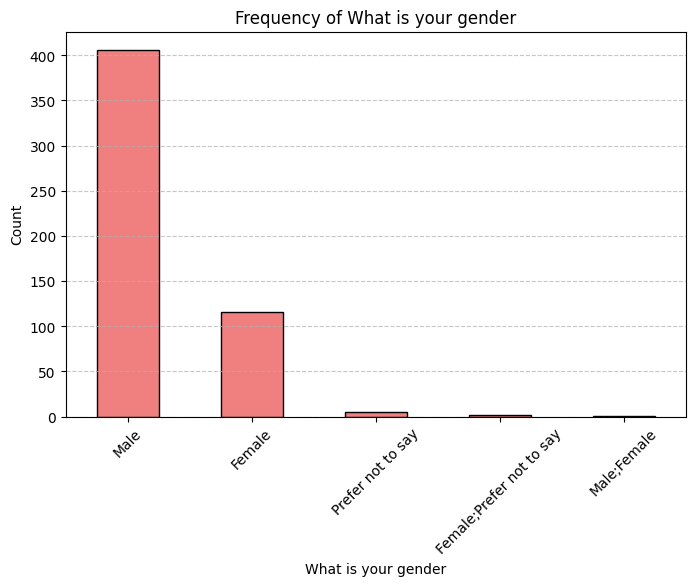

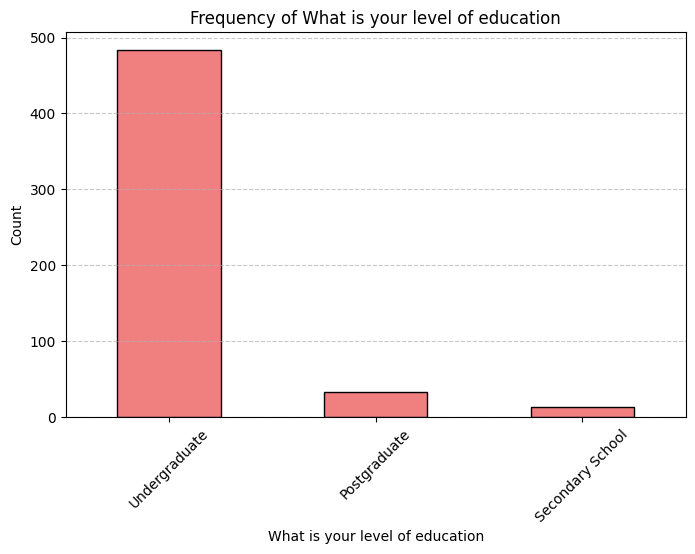

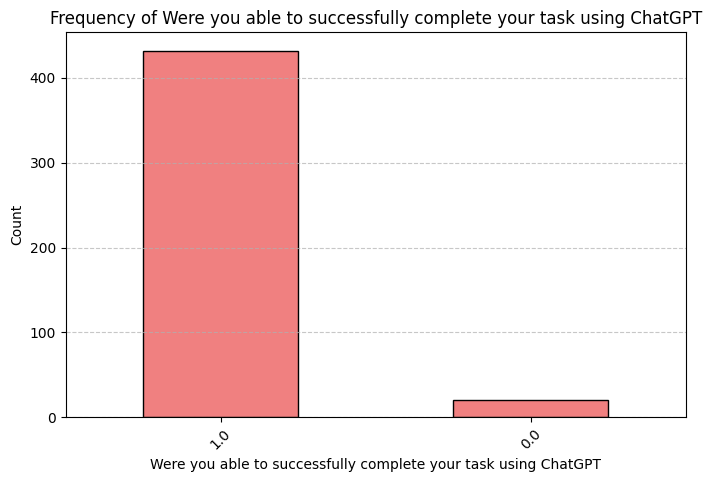

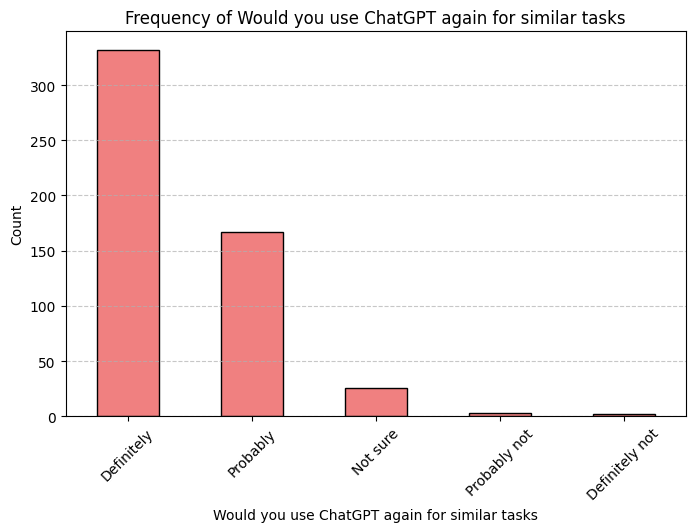

In [8]:
# Plot bar charts for categorical columns
for col in categorical_columns:
    plt.figure(figsize=(8, 5))
    data[col].value_counts().plot(kind='bar', color='lightcoral', edgecolor='black')
    plt.title(f"Frequency of {col.replace('_', ' ')}")
    plt.xlabel(col.replace('_', ' '))
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()


In [9]:
# Import required libraries
import pandas as pd
import re  # Regular expressions for text cleaning

# Load the cleaned dataset
file_path = "Cleaned_User_Experience_Feedback.csv"
data = pd.read_csv(file_path)

# List of open-ended columns to analyze
text_columns = [
    'What_did_you_like_most_about_ChatGPT',
    'What_did_you_dislike_or_find_frustrating_about_ChatGPT',
    'What_suggestions_do_you_have_for_improving_ChatGPT'
]

# Text cleaning function
def clean_text(text):
    if pd.isna(text):  # Handle missing values
        return ""
    # Remove special characters, numbers, and extra spaces; convert to lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove non-alphabetic characters
    text = re.sub(r'\s+', ' ', text)  # Replace multiple spaces with a single space
    return text.strip().lower()

# Apply the cleaning function to each column
for col in text_columns:
    data[col] = data[col].apply(clean_text)

# Display the first few cleaned responses
for col in text_columns:
    print(f"\nCleaned responses for {col}:")
    print(data[col].head())



Cleaned responses for What_did_you_like_most_about_ChatGPT:
0                         response
1                       allucinate
2    i like its depth in knowledge
3                                 
4                                 
Name: What_did_you_like_most_about_ChatGPT, dtype: object

Cleaned responses for What_did_you_dislike_or_find_frustrating_about_ChatGPT:
0                               
1                               
2    it can not reason on it own
3                               
4                               
Name: What_did_you_dislike_or_find_frustrating_about_ChatGPT, dtype: object

Cleaned responses for What_suggestions_do_you_have_for_improving_ChatGPT:
0                      irrelevant information somerime
1                                            too wordy
2                               improve it interactive
3                                                  yes
4    it needs to start accepting images and generat...
Name: What_suggestions_do_you_have_f

In [10]:
from collections import Counter

# Extract and count most common themes/words for each column
for col in text_columns:
    # Tokenize and count words
    word_list = " ".join(data[col]).split()
    word_freq = Counter(word_list)
    
    # Display the most common words
    print(f"\nMost common words in '{col}':")
    for word, freq in word_freq.most_common(10):  # Adjust to show more or fewer words
        print(f"{word}: {freq}")



Most common words in 'What_did_you_like_most_about_ChatGPT':
to: 82
its: 78
and: 62
the: 58
it: 57
response: 54
answers: 45
fast: 42
speed: 29
ability: 24

Most common words in 'What_did_you_dislike_or_find_frustrating_about_ChatGPT':
nothing: 147
not: 57
it: 54
the: 46
to: 37
sometimes: 36
answers: 36
its: 32
in: 20
doesnt: 19

Most common words in 'What_suggestions_do_you_have_for_improving_ChatGPT':
nothing: 84
it: 83
to: 74
more: 72
should: 63
be: 59
the: 54
and: 33
make: 28
human: 27


In [11]:
from textblob import TextBlob

# Add sentiment scores to the dataset
for col in text_columns:
    data[f'{col}_sentiment'] = data[col].apply(lambda x: TextBlob(x).sentiment.polarity)

# Display sentiment scores for a sample of responses
for col in text_columns:
    print(f"\nSentiment scores for {col}:")
    print(data[[col, f'{col}_sentiment']].head())



Sentiment scores for What_did_you_like_most_about_ChatGPT:
  What_did_you_like_most_about_ChatGPT  \
0                             response   
1                           allucinate   
2        i like its depth in knowledge   
3                                        
4                                        

   What_did_you_like_most_about_ChatGPT_sentiment  
0                                             0.0  
1                                             0.0  
2                                             0.0  
3                                             0.0  
4                                             0.0  

Sentiment scores for What_did_you_dislike_or_find_frustrating_about_ChatGPT:
  What_did_you_dislike_or_find_frustrating_about_ChatGPT  \
0                                                          
1                                                          
2                        it can not reason on it own       
3                                                        

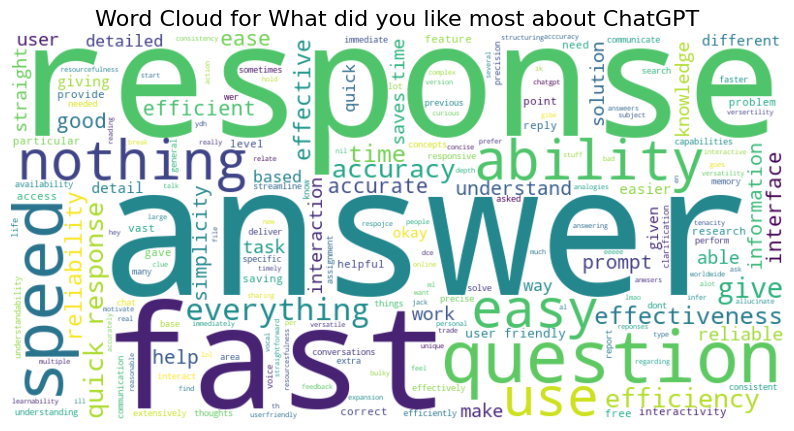

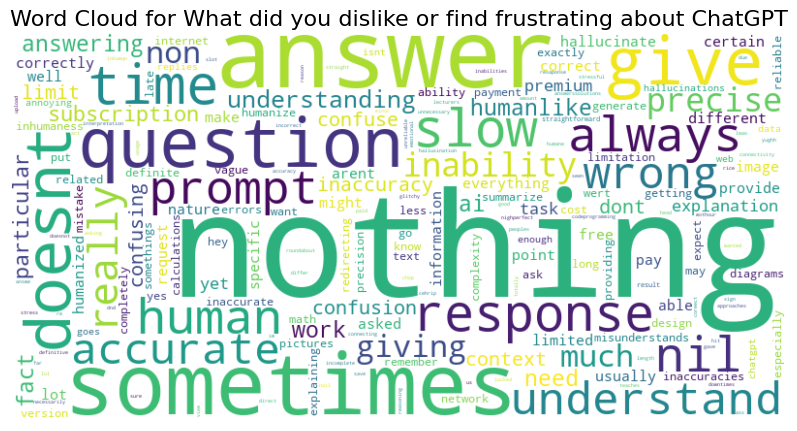

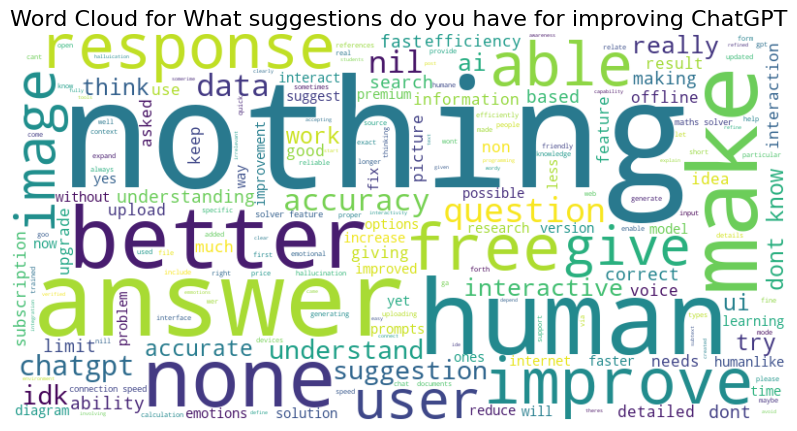

In [12]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Function to generate and display word clouds
def generate_wordcloud(column_data, title):
    text = " ".join(column_data.dropna())  # Combine all responses into one string
    wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='viridis').generate(text)

    # Display the word cloud
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title, fontsize=16)
    plt.show()

# Generate word clouds for each text column
for col in text_columns:
    generate_wordcloud(data[col], f"Word Cloud for {col.replace('_', ' ')}")


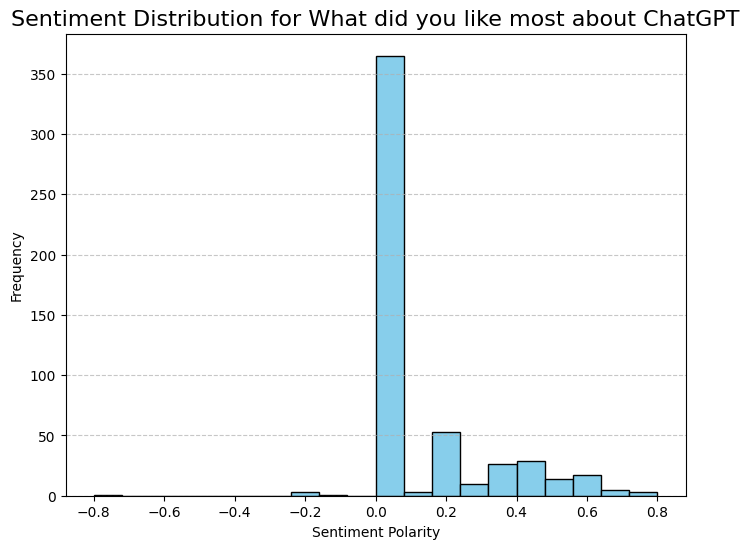

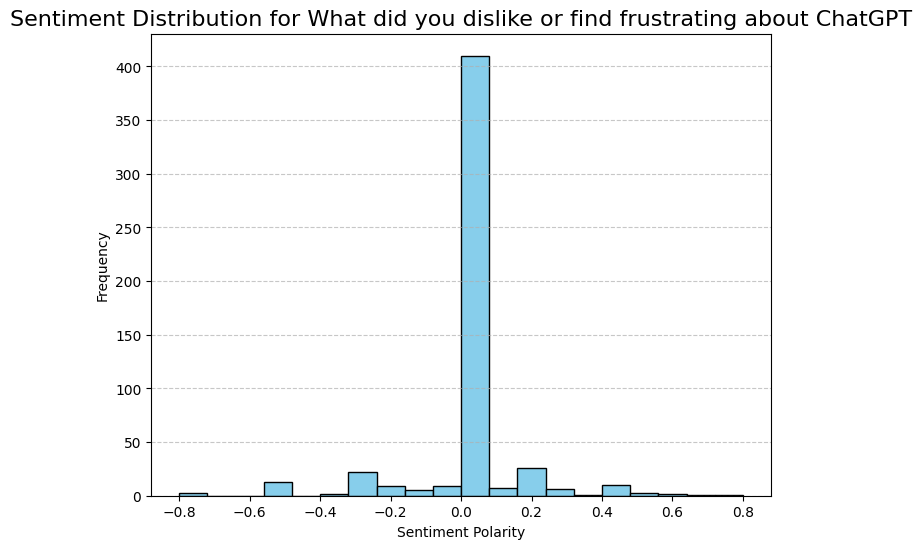

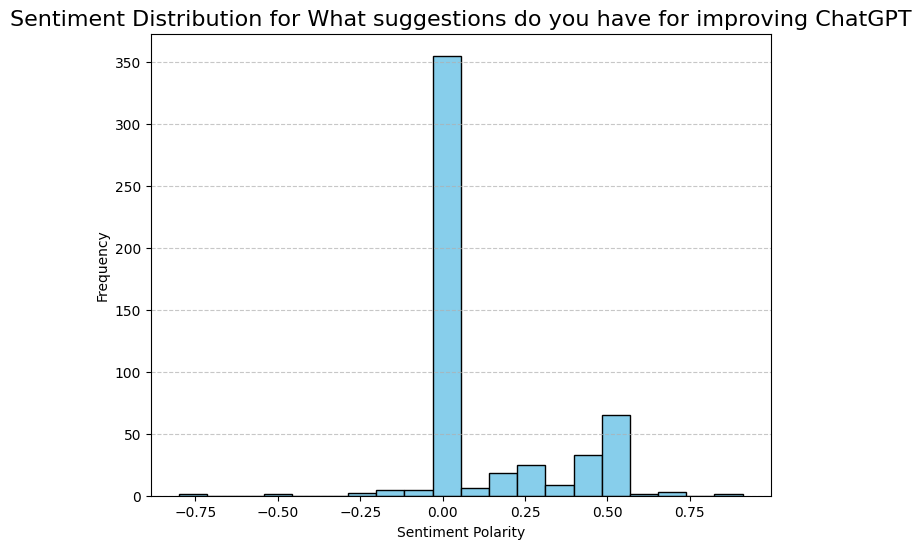

In [13]:
# Function to plot sentiment distribution
def plot_sentiment_distribution(column_data, title):
    plt.figure(figsize=(8, 6))
    plt.hist(column_data, bins=20, color='skyblue', edgecolor='black')
    plt.title(title, fontsize=16)
    plt.xlabel("Sentiment Polarity")
    plt.ylabel("Frequency")
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.show()

# Plot sentiment distribution for each text column
for col in text_columns:
    sentiment_col = f"{col}_sentiment"
    plot_sentiment_distribution(data[sentiment_col], f"Sentiment Distribution for {col.replace('_', ' ')}")


In [15]:
# Inspect the problematic columns
for col in hedonic_columns + pragmatic_columns:
    print(f"\nUnique values in '{col}':")
    print(data[col].unique())



Unique values in 'How_engaging_did_you_find_the_interaction_with_ChatGPT':
[5 4 3 2 1]

Unique values in 'How_enjoyable_was_your_experience_with_ChatGPT':
[nan  4.  3.  5.  2.  1.]

Unique values in 'Did_ChatGPTs_responses_feel_natural_and_humanlike':
['Met expectations' 'Exceeded expectations' 'Neutral' 'Most of the time'
 'A;ways' 'Rarely' 'Never']

Unique values in 'How_easy_was_it_to_interact_with_ChatGPT':
[1 5 3 2 4]

Unique values in 'How_familiar_are_you_with_using_AI_chatbots':
[5 2 3 4 1]

Unique values in 'How_effectively_did_ChatGPT_provide_solutions_or_answers_to_your_queries':
[nan]


In [16]:
# Mapping for 'Did_ChatGPTs_responses_feel_natural_and_humanlike'
text_to_numeric = {
    'Never': 1,
    'Rarely': 2,
    'Neutral': 3,
    'Met expectations': 4,
    'Most of the time': 4,  # Assign equivalent numeric scores
    'Exceeded expectations': 5,
    'Always': 5,
    'A;ways': 5  # Correct typo
}

# Apply mapping and fix typos
data['Did_ChatGPTs_responses_feel_natural_and_humanlike'] = data['Did_ChatGPTs_responses_feel_natural_and_humanlike'].replace('A;ways', 'Always')
data['Did_ChatGPTs_responses_feel_natural_and_humanlike'] = data['Did_ChatGPTs_responses_feel_natural_and_humanlike'].map(text_to_numeric)


In [17]:
# Impute missing values with column mean
data['How_enjoyable_was_your_experience_with_ChatGPT'].fillna(
    data['How_enjoyable_was_your_experience_with_ChatGPT'].mean(), inplace=True
)


C:\Users\PSALMTECH\AppData\Local\Temp\ipykernel_12180\939296072.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['How_enjoyable_was_your_experience_with_ChatGPT'].fillna(


In [18]:
# Drop the empty column
data.drop(columns=['How_effectively_did_ChatGPT_provide_solutions_or_answers_to_your_queries'], inplace=True)


In [19]:
# Define updated column groups
pragmatic_columns = [
    'How_easy_was_it_to_interact_with_ChatGPT',
    'How_familiar_are_you_with_using_AI_chatbots'
]

hedonic_columns = [
    'How_engaging_did_you_find_the_interaction_with_ChatGPT',
    'How_enjoyable_was_your_experience_with_ChatGPT',
    'Did_ChatGPTs_responses_feel_natural_and_humanlike'
]

# Recalculate weighted averages
pragmatic_score = weighted_average(data, pragmatic_columns)
hedonic_score = weighted_average(data, hedonic_columns)

print(f"Pragmatic Quality Score: {pragmatic_score:.2f}")
print(f"Hedonic Quality Score: {hedonic_score:.2f}")


Pragmatic Quality Score: 3.22
Hedonic Quality Score: 3.67


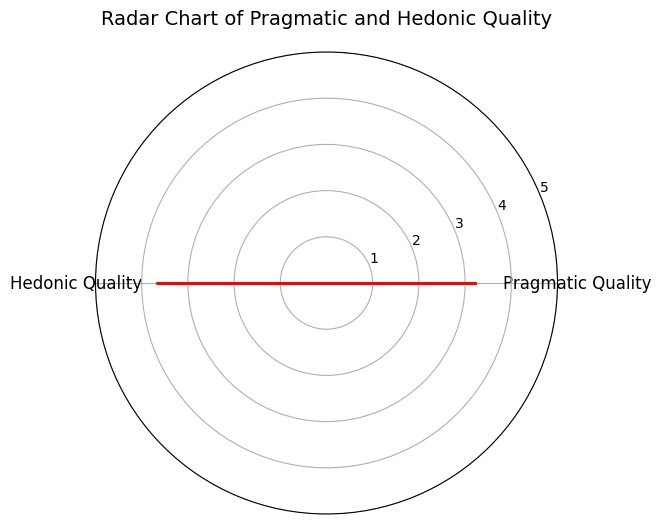

In [20]:
import numpy as np
from math import pi

# Data for radar chart
categories = ['Pragmatic Quality', 'Hedonic Quality']
values = [pragmatic_score, hedonic_score]

# Add the first value to the end to close the radar chart
values += values[:1]

# Angle for each category
angles = np.linspace(0, 2 * np.pi, len(categories), endpoint=False).tolist()
angles += angles[:1]

# Create radar chart
fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
ax.fill(angles, values, color='lightcoral', alpha=0.4)
ax.plot(angles, values, color='red', linewidth=2, linestyle='solid')
ax.set_yticks([1, 2, 3, 4, 5])
ax.set_ylim(0, 5)
ax.set_xticks(angles[:-1])
ax.set_xticklabels(categories, fontsize=12)

# Add title
plt.title('Radar Chart of Pragmatic and Hedonic Quality', fontsize=14, pad=20)

# Display the radar chart
plt.show()


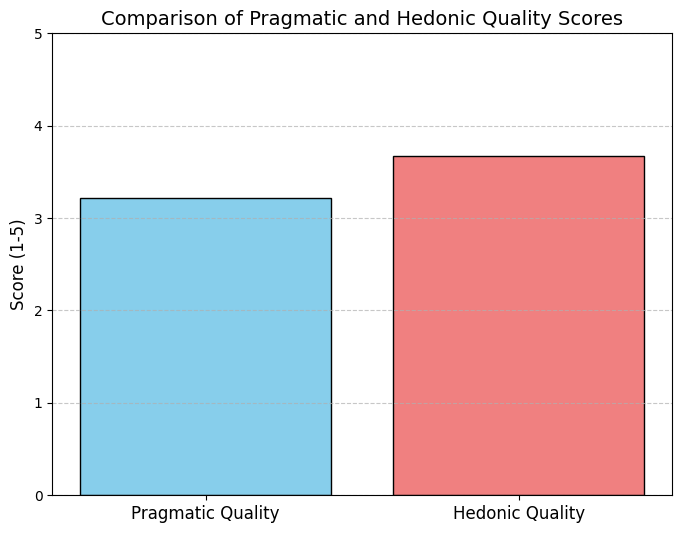

In [21]:
import matplotlib.pyplot as plt

# Data for visualization
qualities = ['Pragmatic Quality', 'Hedonic Quality']
scores = [pragmatic_score, hedonic_score]

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(qualities, scores, color=['skyblue', 'lightcoral'], edgecolor='black')
plt.ylim(0, 5)  # Assuming a scale of 1 to 5
plt.title('Comparison of Pragmatic and Hedonic Quality Scores', fontsize=14)
plt.ylabel('Score (1-5)', fontsize=12)
plt.xticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the chart
plt.show()
